In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
train_path='train.txt'
valid_path='valid.txt'

In [2]:
#!pip install xlsxwriter
import os 
import shutil
import xlsxwriter 
import cv2 
import pandas as pd


In [5]:
f=open(train_path)
annots_train=[]
im_train=[]
for i in f:
  # print(i,i[-1])
  if i[-2]=='g':
    if i[0:-1].endswith('png') or i[0:-1].endswith('jpg'):
      annots_train.append(i[0:-4]+'txt')
      im_train.append(i[0:-1])

    elif i[0:-1].endswith('jpeg'):
      continue
      # im_train.append(i[0:-1])
      # annots_train.append(i[0:-5]+'txt')

f=open(valid_path)
annots_valid=[]
im_valid=[]
for i in f:
  if i[-2]=='g':
    if i[0:-1].endswith('png') or i[0:-1].endswith('jpg'):
      annots_valid.append(i[0:-4]+'txt')
      im_valid.append(i[0:-1])

    elif i[0:-1].endswith('jpeg'):
      continue
      annots_valid.append(i[0:-5]+'txt')
      im_valid.append(i[0:-1])

  # annots_valid.append(i[0:-3]+'txt')
print(len(annots_valid),len(im_valid),len(annots_train),len(im_train))
os.makedirs('data/',exist_ok=True)
os.makedirs('data/annotations/',exist_ok=True)
os.makedirs('data/images',exist_ok=True)
os.makedirs('data/images/train/',exist_ok=True)
os.makedirs('data/images/test/',exist_ok=True)
workbook_train = xlsxwriter.Workbook('train.xlsx') 
worksheet_train = workbook_train.add_worksheet() 
worksheet_train.write('A1', 'filename') 
worksheet_train.write('B1', 'width') 
worksheet_train.write('C1', 'height') 
worksheet_train.write('D1', 'class') 
worksheet_train.write('E1', 'xmin') 
worksheet_train.write('F1', 'ymin') 
worksheet_train.write('G1', 'xmax') 
worksheet_train.write('H1', 'ymax') 
row=1
for i,j in zip(annots_train,im_train):
  f=open(i)
  shutil.copy(j,'data/images/train/'+j.split('/')[-1])
  im=cv2.imread(j)
  y,x,_=im.shape
  # print(i)
  for k in f:
    # print(k) 
    words=k.split()
    xmin=(int(x*(float(words[1])-float(words[3])/2)))
    xmax=(int(x*(float(words[1])+float(words[3])/2)))
    ymin=(int(y*(float(words[2])-float(words[4])/2)))
    ymax=(int(y*(float(words[2])+float(words[4])/2)))
    worksheet_train.write(row,0,j.split('/')[-1])
    worksheet_train.write(row,1,y)
    worksheet_train.write(row,2,x)
    worksheet_train.write(row,3,'class'+str(int(words[0])+1))
    worksheet_train.write(row,4,xmin)
    worksheet_train.write(row,5,ymin)
    worksheet_train.write(row,6,xmax)
    worksheet_train.write(row,7,ymax)
    row+=1
workbook_test = xlsxwriter.Workbook('test.xlsx') 
worksheet_test = workbook_test.add_worksheet() 
worksheet_test.write('A1', 'filename') 
worksheet_test.write('B1', 'width') 
worksheet_test.write('C1', 'height') 
worksheet_test.write('D1', 'class') 
worksheet_test.write('E1', 'xmin') 
worksheet_test.write('F1', 'ymin') 
worksheet_test.write('G1', 'xmax') 
worksheet_test.write('H1', 'ymax')
row=1 
for i,j in zip(annots_valid,im_valid):
  f=open(i)
  shutil.copy(j,'data/images/test/'+j.split('/')[-1])
  im=cv2.imread(j)
  y,x,_=im.shape
  for k in f: 
    words=k.split()
    xmin=(int(x*(float(words[1])-float(words[3])/2)))
    xmax=(int(x*(float(words[1])+float(words[3])/2)))
    ymin=(int(y*(float(words[2])-float(words[4])/2)))
    ymax=(int(y*(float(words[2])+float(words[4])/2)))
    worksheet_test.write(row,0,j.split('/')[-1])
    worksheet_test.write(row,1,y)
    worksheet_test.write(row,2,x)
    worksheet_test.write(row,3,'class'+str(int(words[0])+1))
    worksheet_test.write(row,4,xmin)
    worksheet_test.write(row,5,ymin)
    worksheet_test.write(row,6,xmax)
    worksheet_test.write(row,7,ymax)
    row+=1
workbook_train.close() 
workbook_test.close()


305 305 1218 1218


In [6]:

xl=pd.read_excel('train.xlsx')
xl.to_csv('data/annotations/train_labels.csv', encoding='utf-8', index=True)
xl=pd.read_excel('test.xlsx')
xl.to_csv('data/annotations/test_labels.csv', encoding='utf-8', index=True)

In [7]:
im=cv2.imread('MainDataset/105.jpg')
im.shape

(955, 1300, 3)

In [10]:
import pandas as pd
import cv2
aa=pd.read_csv('object_detection_demo_flow/data/annotations/train_labels.csv')
fl=aa['filename'].tolist()
for i in fl:
  im=cv2.imread('object_detection_demo_flow/data/images/train/'+i)
  # print(i)
  if im.shape[2]==3:
    continue
  print(i)
  print(im.shape)

In [7]:
# %%capture
#After this cell executes runtime will restart to finish the install, ignore and close the crash message, continue running cells starting with the one below
!pip install numpy==1.17.5;
import os
# os.kill(os.getpid(), 9)

     |████████████████████████████████| 20.0MB 1.2MB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.17.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [5]:
%tensorflow_version 1.x
!pip install tf_slim

TensorFlow 1.x selected.
     |████████████████████████████████| 358kB 7.9MB/s 


In [9]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [11]:
# For the fruit model included in the repo below we have 240 training images
# For faster training time, images should be resized to 300x300 and then annotated
# Images should contain the objects of interest at various scales, angles, lighting conditions, locations
# For acceptable results - mAP@0.5 of 0.9 the model was trained with batch size of 24
# and 5000 steps. this takes about 1h using 2 augmentations. 
# using 5 augmentations it takes about 2h 
num_steps = 5000  # A step means using a single batch of data. larger batch, less steps required
#Number of evaluation steps.
num_eval_steps = 50
#Batch size 24 is a setting that generally works well. can be changed higher or lower 
MODELS_CONFIG = {
        'ssd_mobilenet_v2': {
        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': 24
    }
}
selected_model = 'ssd_mobilenet_v2'

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

# Training batch size fits in Colab's GPU memory for selected model.
batch_size = MODELS_CONFIG[selected_model]['batch_size']

## Clone the `object_detection_demo_flow` repository

In [8]:
repo_url = 'https://github.com/GotG/object_detection_demo_flow'
import os
repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))
!git clone {repo_url}

#!git pull

'git' is not recognized as an internal or external command,
operable program or batch file.


#If you wish to use your own data, run the cells below.
(Otherwise the model can train with the data already present in the cloned repo)

In [9]:
#To train on your own data:
#Remove repo data (images) for training/testing/final testing
# !rm -r /content/object_detection_demo_flow/data/images/final_test/
!rm -r /content/object_detection_demo_flow/data/images/train/
!rm -r /content/object_detection_demo_flow/data/images/test/
!cp -r /content/data/images/  /content/object_detection_demo_flow/data/
!cp -r /content/data/annotations/  /content/object_detection_demo_flow/data/
# !rm -r /content/object_detection_demo_flow/data/images
# !rm -r /content/object_detection_demo_flow/data/annotations

In [10]:
# %%capture
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git
%cd /content/models/
!git checkout 58d19c67e1d30d905dd5c6e5092348658fed80af
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
!python object_detection/builders/model_builder_test.py

/content
/content/models
Note: checking out '58d19c67e1d30d905dd5c6e5092348658fed80af'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 58d19c67 Internal change
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/main/l/lxml/python-lxml_4.2.1-1ubuntu0.3_amd64.deb  404  Not Found [IP: 91.189.88.152 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?
/content/models/research
object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.


In [11]:
# %%capture
%cd {repo_dir_path}

# Convert train folder annotation xml files to a single csv file,
# # generate the `label_map.pbtxt` file to `data/` directory as well.
# !python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations


# # Convert test folder annotation xml files to a single csv.
# !python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
!python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
!python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt

# Set the paths
test_record_fname = 'object_detection_demo_flow/data/annotations/test.record'
train_record_fname = 'object_detection_demo_flow/data/annotations/train.record'
label_map_pbtxt_fname = 'object_detection_demo_flow/data/annotations/label_map.pbtxt'

/content/object_detection_demo_flow


W0404 05:49:13.179734 139828105979776 module_wrapper.py:139] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0404 05:49:13.374979 139828105979776 module_wrapper.py:139] From generate_tfrecord.py:53: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object_detection_demo_flow/data/annotations/train.record


W0404 05:49:17.688025 139981913397120 module_wrapper.py:139] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0404 05:49:17.740992 139981913397120 module_wrapper.py:139] From generate_tfrecord.py:53: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/object_detection_demo_flow/data/annotations/test.record


In [12]:
%cd /content/models/research

import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = '/content/models/research/pretrained_model'

if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

/content/models/research
/content/models/research/pretrained_model
total 135M
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 .
drwxr-xr-x 63 root   root  4.0K Apr  4 05:49 ..
-rw-r--r--  1 345018 89939   77 Mar 30  2018 checkpoint
-rw-r--r--  1 345018 89939  67M Mar 30  2018 frozen_inference_graph.pb
-rw-r--r--  1 345018 89939  65M Mar 30  2018 model.ckpt.data-00000-of-00001
-rw-r--r--  1 345018 89939  15K Mar 30  2018 model.ckpt.index
-rw-r--r--  1 345018 89939 3.4M Mar 30  2018 model.ckpt.meta
-rw-r--r--  1 345018 89939 4.2K Mar 30  2018 pipeline.config
drwxr-xr-x  3 345018 89939 4.0K Mar 30  2018 saved_model


In [13]:
#TF pretrained model checkpoint
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'/content/models/research/pretrained_model/model.ckpt'

## Configuring a Training Pipeline

In [14]:
import os
pipeline_fname = os.path.join('/content/models/research/object_detection/samples/configs/', pipeline_file)

assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [15]:
import re
iou_threshold = 0.50
num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    # Set number of classes num_classes.
    s = re.sub('iou_threshold: [0-9].[0-9]+',
               'iou_threshold: {}'.format(iou_threshold), s)
    
    f.write(s)

In [16]:
# #Have a look at the config file with various settings
# !cat {pipeline_fname}

# Train the model

##[Optional] The cell below adds Tensorboard visualization to the training process.
Will open in new tab.

In [17]:
#After running this cell click on the link in the output cell to open tensorboard
#Tensoarboard will show you graphically different training parameters as the model is training
#when training finishes after the set number of steps, tensorboard can be used to see a nice summary of the training process
#Visuals will load in Tensorboard after the model has gone through a few hundred steps

model_dir = 'training/'
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = model_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2021-04-04 05:50:18--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.85.41.146, 54.175.245.12, 54.159.163.191, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.85.41.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14746350 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.06M  12.0MB/s    in 1.2s    

2021-04-04 05:50:20 (12.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14746350/14746350]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


## Start the training

In [19]:
model_dir = 'training/'
# Optionally remove content in output model directory for a fresh start.
# !rm -rf {model_dir}
# os.makedirs(model_dir, exist_ok=True)
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}

W0404 05:55:02.778191 140713195296640 model_lib.py:717] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 5000
I0404 05:55:02.778413 140713195296640 config_util.py:552] Maybe overwriting train_steps: 5000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0404 05:55:02.778509 140713195296640 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0404 05:55:02.778588 140713195296640 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0404 05:55:02.778676 140713195296640 config_util.py:552] Maybe overwriting eval_num_epochs: 1
INFO:tensorflow:Maybe overwriting load_pretrained: True
I0404 05:55:02.778750 140713195296640 config_util.py:552] Maybe overwriting load_pretrained: True
INFO:tensorflow:Ignoring config override key: load_pretrained
I0404 05:55:02.778824 140713195296640 config_util.py:5

In [20]:
#model dir check for the trained model
!ls {model_dir}

checkpoint
eval_0
events.out.tfevents.1617515721.c5618e8579fb
export
graph.pbtxt
model.ckpt-1948.data-00000-of-00001
model.ckpt-1948.index
model.ckpt-1948.meta
model.ckpt-2929.data-00000-of-00001
model.ckpt-2929.index
model.ckpt-2929.meta
model.ckpt-3914.data-00000-of-00001
model.ckpt-3914.index
model.ckpt-3914.meta
model.ckpt-4898.data-00000-of-00001
model.ckpt-4898.index
model.ckpt-4898.meta
model.ckpt-5000.data-00000-of-00001
model.ckpt-5000.index
model.ckpt-5000.meta


## Export a Trained Inference Graph
Once your training job is complete, you need to extract the newly trained inference graph, which will be later used to perform the object detection. This can be done as follows:

In [ ]:
#clean output_directory if necessary to start fresh:

# !rm -rf /content/object_detection_demo/fine_tuned_model/ 
# os.makedirs('/content/object_detection_demo_flow/fine_tuned_model/', exist_ok=True)

In [21]:
%%capture
import re
import numpy as np

output_directory = './fine_tuned_model'
# output_directory = '/content/gdrive/My\ Drive/data/'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

In [ ]:
#export directory check
# !ls {output_directory}

In [22]:
import os
pb_fname = os.path.join(os.path.abspath(output_directory), "frozen_inference_graph.pb")
assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)
# !ls -alh {pb_fname}

In [23]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fname = os.path.basename(pb_fname)
# Create & upload a text file.
uploaded = drive.CreateFile({'title': fname})
uploaded.SetContentFile(pb_fname)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1PxVhm3mQB0Mo4_WVgC9cJOa30dJgq_G9


In [24]:
import pandas as pd

df=pd.read_csv('/content/object_detection_demo_flow/data/annotations/train_labels.csv')
mm=df[['width','height','xmin','xmax','ymin']]

## Running Inference: Checking what the trained model can detect
Test with images in repository `object_detection_demo_flow/data/images/final test` directory.

In [35]:
!rm -r /content/object_detection_demo_flow/data/images/final_test/
!cp -r /content/data/images/test /content/object_detection_demo_flow/data/images/final_test/

In [65]:
import os
import glob
pb_fname='/content/frozen_inference_graph.pb'
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = pb_fname
label_map_pbtxt_fname='/content/object_detection_demo_flow/data/annotations/label_map.pbtxt'
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = label_map_pbtxt_fname

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR = os.path.join(repo_dir_path, '/content/data/images/test')

# assert os.path.isfile(pb_fname)
# assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
# assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/content/data/images/test/maksssksksss642.png', '/content/data/images/test/404.jpg', '/content/data/images/test/maksssksksss235.png', '/content/data/images/test/312.jpg', '/content/data/images/test/maksssksksss535.png', '/content/data/images/test/maksssksksss617.png', '/content/data/images/test/maksssksksss461.png', '/content/data/images/test/161.jpg', '/content/data/images/test/maksssksksss623.png', '/content/data/images/test/maksssksksss781.png', '/content/data/images/test/maksssksksss823.png', '/content/data/images/test/maksssksksss837.png', '/content/data/images/test/maksssksksss702.png', '/content/data/images/test/maksssksksss4.png', '/content/data/images/test/maksssksksss274.png', '/content/data/images/test/maksssksksss588.png', '/content/data/images/test/maksssksksss472.png', '/content/data/images/test/maksssksksss378.png', '/content/data/images/test/256.jpg', '/content/data/images/test/646.jpg', '/content/data/images/test/448.jpg', '/content/data/images/test/maksssksksss438.p

/content/models/research/object_detection
/content/data/images/test/maksssksksss642.png


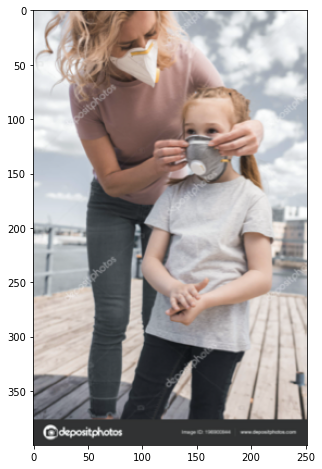

/content/data/images/test/404.jpg


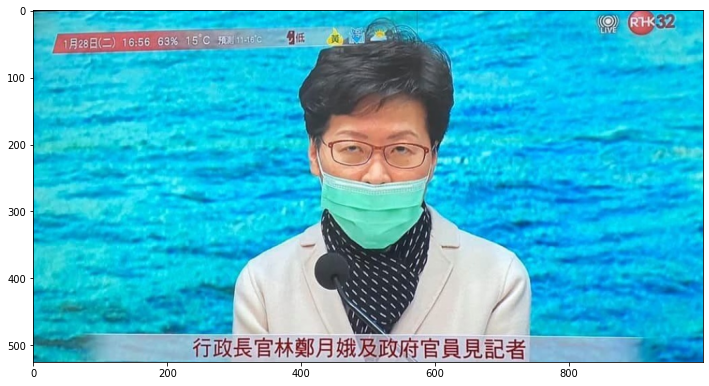

/content/data/images/test/maksssksksss235.png


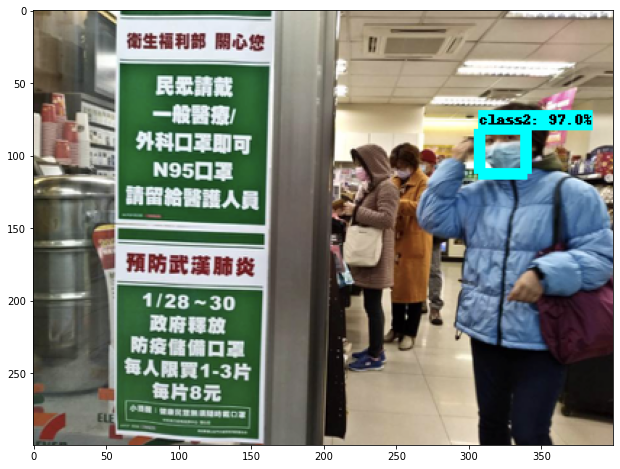

/content/data/images/test/312.jpg


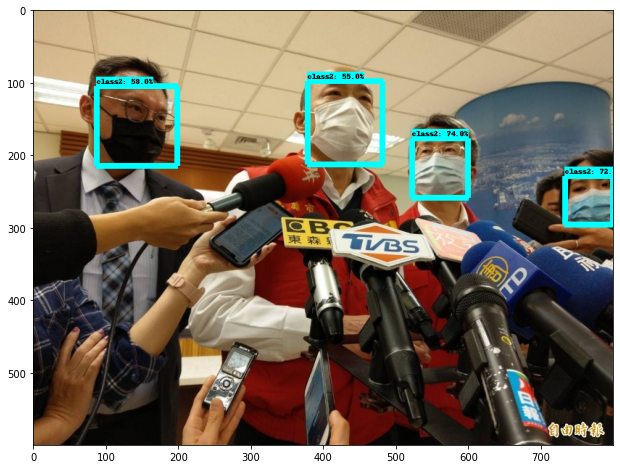

/content/data/images/test/maksssksksss535.png


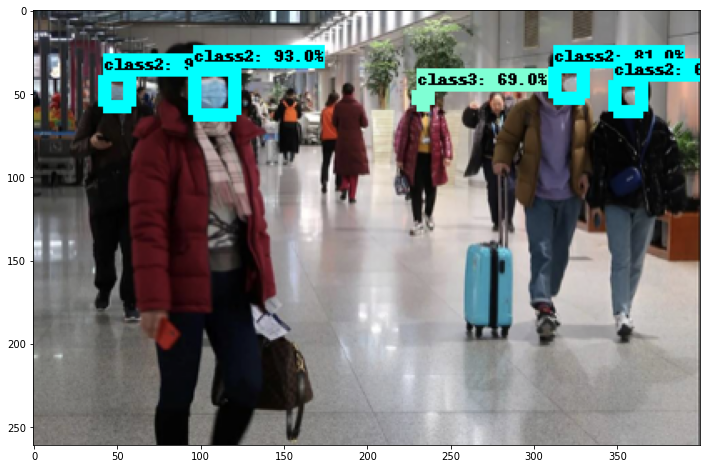

/content/data/images/test/maksssksksss617.png


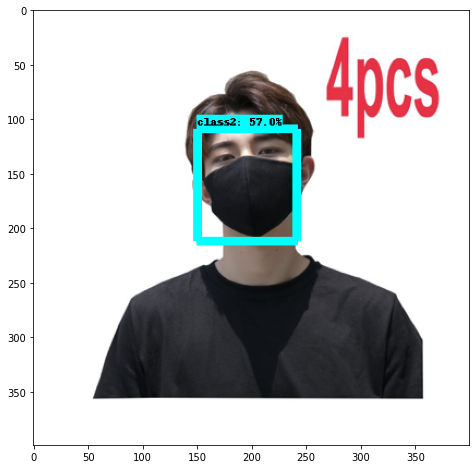

/content/data/images/test/maksssksksss461.png


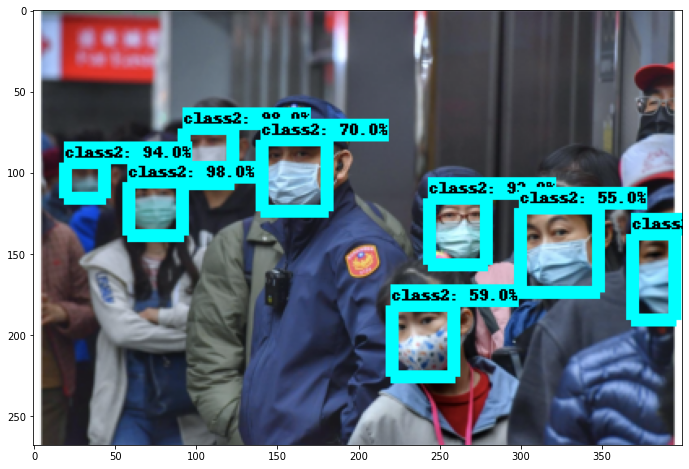

/content/data/images/test/161.jpg


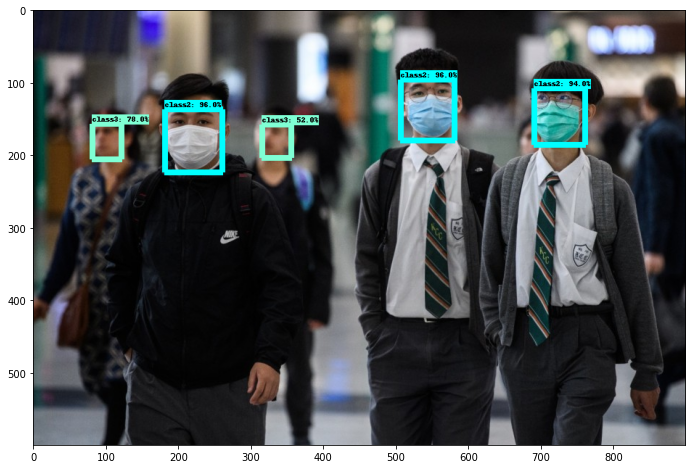

/content/data/images/test/maksssksksss623.png


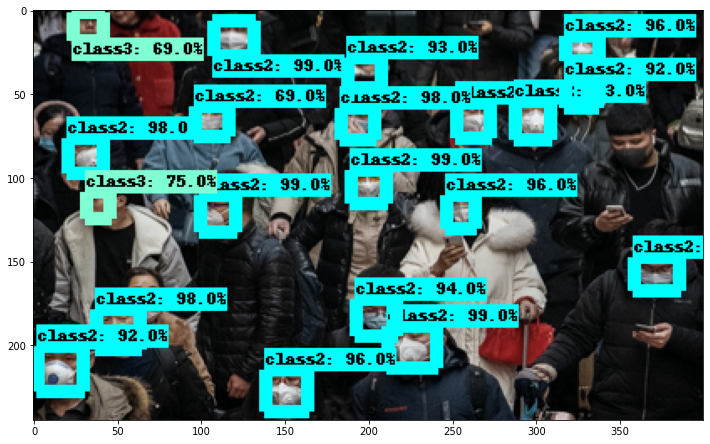

/content/data/images/test/maksssksksss781.png


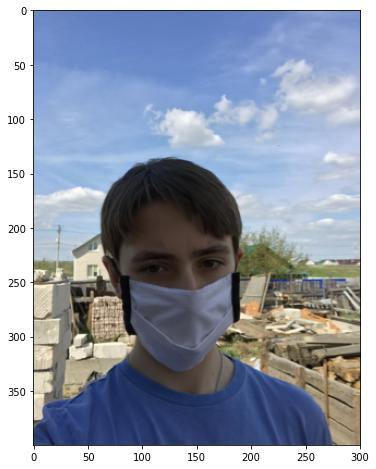

/content/data/images/test/maksssksksss823.png


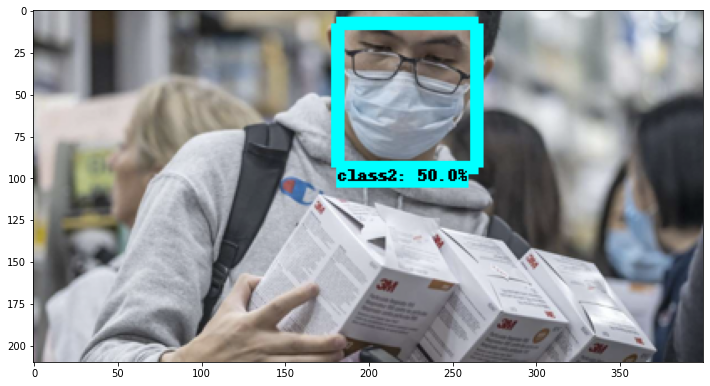

/content/data/images/test/maksssksksss837.png


In [70]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
# This is needed to display the images.
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

count=0
import cv2

for image_path in TEST_IMAGE_PATHS:
    image = cv2.imread(image_path)
    image_np = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    #image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # print(output_dict)
    if count>10:
      break
    count+=1
    #Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
    plt.show()

In [28]:
!python /content/models/research/object_detection/model_main.py --pipeline_config_path={pipeline_fname} --model_dir={model_dir} --checkpoint_dir={'/content/models/research/training/model.ckpt-4815.data-00000-of-00001'} --run_once=True

W0404 07:02:43.735499 140307084801920 model_lib.py:717] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: None
I0404 07:02:43.735697 140307084801920 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0404 07:02:43.735781 140307084801920 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0404 07:02:43.735861 140307084801920 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0404 07:02:43.735994 140307084801920 config_util.py:552] Maybe overwriting eval_num_epochs: 1
INFO:tensorflow:Maybe overwriting load_pretrained: True
I0404 07:02:43.736078 140307084801920 config_util.py:552] Maybe overwriting load_pretrained: True
INFO:tensorflow:Ignoring config override key: load_pretrained
I0404 07:02:43.736157 140307084801920 config_util.py:5

In [71]:
import os
import numpy as np

def ssd_to_yolo(box, height, width):
    ymin, xmin, ymax, xmax = box[0], box[1], box[2], box[3]
    x_center = (xmin + xmax)/2.0/width
    y_center = (ymin + ymax)/2.0/height
    x_w = (xmax - xmin)/float(width)
    y_h = (ymax - ymin)/float(height)
    output = [str(x_center), str(y_center), str(x_w), str(y_h)]
    return output

def test_annots_maker(image_path,
                      target_path,
                      image_np,
                      boxes,
                      classes,
                      scores,
                      max_boxes_to_draw=20):
    
    target_path = target_path if target_path.endswith('/')\
        else target_path + '/'

    image_path = image_path if '/' not in image_path\
        else image_path.split('/')[-1]
        
    txt_name = target_path + image_path.split('.')[0]+'.txt'
    os.makedirs(target_path, exist_ok=True)
    with open(txt_name, 'w') as f:
        for i in range(boxes.shape[0]):
            if max_boxes_to_draw == i+1:
                break
            else:
                box = tuple(boxes[i].tolist())
                score = str(scores[i])
                height, width, _ = image_np.shape
                box = ssd_to_yolo(box, height, width)
                cls = str(classes[i]-1)
                line = cls + '\t' + box[0] + '\t' + box[1] + '\t' + box[2] + '\t' + box[3] + '\t' + score + '\n'
                f.write(line)

    
image_np = np.zeros((400, 500, 3))
image_path = '/content/try/test_image.jpg'
boxes = np.array([[100, 100, 200, 200], [100, 100, 400, 400]])
classes = np.array([1, 2])
scores = np.array([0.26, 0.8])
target_path = '/content/test'
test_annots_maker(image_path,
                      target_path,
                      image_np,
                      boxes,
                      classes,
                      scores,
                      max_boxes_to_draw=20)

In [73]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
# This is needed to display the images.
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

count=0
import cv2

for image_path in TEST_IMAGE_PATHS:
    image = cv2.imread(image_path)
    image_np = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    #image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.

    ######################################################

    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # print(output_dict)
    # if count>10:
    #   break
    # count+=1
    #Visualization of the results of a detection.
    # vis_util.visualize_boxes_and_labels_on_image_array(
    #     image_np,
    #     output_dict['detection_boxes'],
    #     output_dict['detection_classes'],
    #     output_dict['detection_scores'],
    #     category_index,
    #     instance_masks=output_dict.get('detection_masks'),
    #     use_normalized_coordinates=True,
    #     line_thickness=8)
    
    test_annots_maker(image_path,
                      '/content/Final',
                      image_np, 
                      output_dict['detection_boxes'],
                      output_dict['detection_classes'],
                      output_dict['detection_scores'])


    # plt.figure(figsize=IMAGE_SIZE)
    # plt.imshow(image_np)
    # plt.show()

/content/models/research/object_detection
/content/data/images/test/maksssksksss642.png
/content/data/images/test/404.jpg
/content/data/images/test/maksssksksss235.png
/content/data/images/test/312.jpg
/content/data/images/test/maksssksksss535.png
/content/data/images/test/maksssksksss617.png
/content/data/images/test/maksssksksss461.png
/content/data/images/test/161.jpg
/content/data/images/test/maksssksksss623.png
/content/data/images/test/maksssksksss781.png
/content/data/images/test/maksssksksss823.png
/content/data/images/test/maksssksksss837.png
/content/data/images/test/maksssksksss702.png
/content/data/images/test/maksssksksss4.png
/content/data/images/test/maksssksksss274.png
/content/data/images/test/maksssksksss588.png
/content/data/images/test/maksssksksss472.png
/content/data/images/test/maksssksksss378.png
/content/data/images/test/256.jpg
/content/data/images/test/646.jpg
/content/data/images/test/448.jpg
/content/data/images/test/maksssksksss438.png
/content/data/images